# Import Modules

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import datetime

# Load data file

In [73]:
file_name = "vasopressIn_dataset.xlsx" # within same folder as notebook file
pre_sheet_name = 'Pre Restriction'
post_sheet_name = 'Post Restriction'

# Read file into a pandas DataFrame
df_pre = pd.read_excel(file_name, sheet_name = pre_sheet_name) # pre restriction dataframe
df_post = pd.read_excel(file_name, sheet_name = post_sheet_name) # post restriction dataframe

# Cleaning Dataset

## Cleaning goals:
* drop all empty columns and rows
* drop empty columns for rate pressor, vasopressIN columns
* Change data types to correct type for analysis later
* standardize time/date formats
* Remember, if time difference value is negative, drop value from dataset
* Clean time values: if value is less than 4 digits, add leading zeroes until it is 4 digits

In [74]:
# Drop empty columns to clean up df
#df = df.reset_index().dropna(axis = 1, how = 'all'
df_pre = df_pre.reset_index().dropna(axis = 1, how = 'all')
df_post = df_post.reset_index().dropna(axis = 1, how = 'all')

In [75]:
# Check number of rows
print(len(df_pre))
print(len(df_post))

53
37


In [76]:
# Drop empty rows
df_pre = df_pre.dropna(axis = 0, how = 'all')
df_post = df_post.dropna(axis = 0, how = 'all')

In [77]:
# Check if any rows were dropped
print(len(df_pre))
print(len(df_post))

51
37


In [78]:
df_pre.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
0,65,M,109.2,1.0,NE,12,22.5,0.04,2017-02-24 00:00:00,1004,NaT,NaN,02/26/2017,2017-02-26 08:16:00.000
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,1138,2017-02-28,1349.0,02/28/2017,2017-02-28 05:45:00.000
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,545,2017-03-02,900.0,03/02/2017,2017-03-02 14:34:00.000
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,1100,2017-03-17,1500.0,03/17/2017,2017-03-17 13:42:59.999
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,1514,2017-03-19,700.0,03/20/2017,2017-03-20 02:29:59.999


In [79]:
df_post.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor mcg/min,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
0,64.0,M,82.0,1.0,NE,30.0,56.3,0.04,2018-09-03,33.0,NaT,NaN,09/04/2018,2018-09-04 09:14:00.000
1,NaN,NaN,NaN,1.0,NE,19.0,35.6,0.04,2018-09-04,2217.0,2018-09-04,1300.0,09/07/2018,2018-09-07 10:42:59.999
2,91.0,F,74.0,0.0,NE,10.0,18.8,0.04,2018-09-08,1156.0,2018-09-09,800.0,09/09/2018,2018-09-09 08:25:00.000
3,43.0,M,79.3,1.0,NE,30.0,56.3,0.04,2018-09-08,1049.0,2018-09-11,1600.0,09/10/2018,2018-09-10 18:59:59.999
4,43.0,M,79.3,1.0,NE,10.0,4.7,0.04,2018-09-11,303.0,2018-09-11,1600.0,09/13/2018,2018-09-13 09:50:59.999


In [80]:
df_pre.dtypes # check datatypes of both dataframes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time              float64
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [81]:
df_post.dtypes

Age                                float64
Sex                                 object
TBW (kg)                           float64
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor mcg/min               float64
Rate Pressor                       float64
VasopressIN Dose (U/min)           float64
VasopressIN Date            datetime64[ns]
VasopressIN Admin Time             float64
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time              float64
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [82]:
# Change column data type to float
df_pre['Rate Pressor'] = df_pre['Rate Pressor'].astype(float, errors = 'ignore')

In [83]:
# Change column data type to float
df_post['Rate Pressor'] = df_post['Rate Pressor'].astype(float, errors = 'ignore')

In [84]:
# Assign new dataframes for dropped rows with no time values
prevas_df = df_pre.dropna(subset = ['Vasopressin Stop Time', 'Discontinue Time'], how = 'any')
postvas_df = df_post.dropna(subset = ['Vasopressin Stop Time', 'Discontinue Time'], how = 'any')

In [85]:
prevas_df['Vasopressin Stop Time']

1     1349.0
2      900.0
3     1500.0
4      700.0
7     1900.0
8      900.0
10    1255.0
12    1000.0
13    1100.0
14    2200.0
15    1500.0
16     900.0
17    2000.0
18    1800.0
19     825.0
20    1815.0
21    1500.0
22    1600.0
23     400.0
25    1000.0
26    1000.0
28    1800.0
29    2300.0
31    1400.0
32     100.0
34    1300.0
35       0.0
36    2100.0
38    1215.0
42     700.0
Name: Vasopressin Stop Time, dtype: float64

In [86]:
# Check number of rows in each dataframe
print(len(prevas_df))
print(len(postvas_df))

30
33


## Next steps for sorting:
* parse 4 digit time values
* combine the start and stop dates
* subtract with datetime and put into a new series

In [87]:
# first convert admin and stop times to strings instead of floats
prevas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']] = \
prevas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']].astype(int).astype(str)
postvas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']] = \
postvas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']].astype(int).astype(str)

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Psuedocode

1. check if string is within 1 to 4 characters
2. count how many is missing from 4
3. reassign value to have missing zeroes + number

In [88]:
# Change time in and out data points so they are all 4 digits each
# Do this by adding leading zeroes until they are 4 digits
def add_zeroes(string):
    try:
        string = str(string)
    except:
        pass
    
    if string == 'NaN':
        print('No value')
        #return None # return none for NaN value
    elif len(string) == 4:
        return string # return string if it's already long enough
    elif (len(string) >= 1) and (len(string) < 4): # check if between 1 and 4 characters
        count = len(string)
        #print(count)
        diff = 4 - count # find out how many zeroes to add
        #print(diff)
        string = str('0' * diff + string) # add the leading zeroes to have a 4 digit time
        return string
    else:
        #print('Unknown value')
        return None # return none if it's anything else

In [89]:
# Define function to do convert on time columns
def parse_time(string):
    hour = string[:-2]
    minute = string[-2:]
    result = hour + ':' + minute
    return datetime.datetime.strptime(result, '%H:%M').time()

In [90]:
def assign_values(df):
    for i in range(len(df)):
        df.iloc[i] = parse_time(df.iloc[i])
    return df

In [91]:
list(prevas_df)

['Age',
 'Sex',
 'TBW (kg)',
 'Fluid Challenge?',
 'Pressor',
 'Dose Pressor',
 'Rate Pressor',
 'VasopressIN Dose (U/min)',
 'VasopressIN Date',
 'VasopressIN Admin Time',
 'Vasopressin Stop Date',
 'Vasopressin Stop Time',
 'Discontinue Date',
 'Discontinue Time']

In [92]:
test_df = prevas_df.copy()

In [93]:
test_df['Vasopressin Stop Time'] = test_df['Vasopressin Stop Time'].apply(add_zeroes)

In [94]:
test_df['Vasopressin Stop Time']

1     1349
2     0900
3     1500
4     0700
7     1900
8     0900
10    1255
12    1000
13    1100
14    2200
15    1500
16    0900
17    2000
18    1800
19    0825
20    1815
21    1500
22    1600
23    0400
25    1000
26    1000
28    1800
29    2300
31    1400
32    0100
34    1300
35    0000
36    2100
38    1215
42    0700
Name: Vasopressin Stop Time, dtype: object

In [95]:
test_df['Vasopressin Stop Time'] = test_df['Vasopressin Stop Time'].apply(parse_time)

In [96]:
test_df['Vasopressin Stop Time']

1     13:49:00
2     09:00:00
3     15:00:00
4     07:00:00
7     19:00:00
8     09:00:00
10    12:55:00
12    10:00:00
13    11:00:00
14    22:00:00
15    15:00:00
16    09:00:00
17    20:00:00
18    18:00:00
19    08:25:00
20    18:15:00
21    15:00:00
22    16:00:00
23    04:00:00
25    10:00:00
26    10:00:00
28    18:00:00
29    23:00:00
31    14:00:00
32    01:00:00
34    13:00:00
35    00:00:00
36    21:00:00
38    12:15:00
42    07:00:00
Name: Vasopressin Stop Time, dtype: object

In [97]:
# Apply function to change time rows to 4 character strings
prevas_df['Vasopressin Stop Time'] = prevas_df['Vasopressin Stop Time'].apply(add_zeroes)
postvas_df['Vasopressin Stop Time'] = postvas_df['Vasopressin Stop Time'].apply(add_zeroes)

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
col_list = ['VasopressIN Admin Time', 'Vasopressin Stop Time']

In [99]:
for col in col_list:
    prevas_df[col] = prevas_df[col].apply(add_zeroes)
    postvas_df[col] = postvas_df[col].apply(add_zeroes)
    prevas_df[col] = prevas_df[col].apply(parse_time)
    postvas_df[col] = postvas_df[col].apply(parse_time)

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

### Add new column with datetime for datetime operations
* New column named Vasopressin Stop
* Combine stop date with stop time
* Change datatype to datetime
* Add new column for difference between stop time and discontinue time
* Name new column ???

In [100]:
prevas_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [101]:
postvas_df.dtypes

Age                                float64
Sex                                 object
TBW (kg)                           float64
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor mcg/min               float64
Rate Pressor                       float64
VasopressIN Dose (U/min)           float64
VasopressIN Date            datetime64[ns]
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [102]:
test_df.head(n=5) # just for notebook purposes

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,1138,2017-02-28,13:49:00,02/28/2017,2017-02-28 05:45:00.000
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,545,2017-03-02,09:00:00,03/02/2017,2017-03-02 14:34:00.000
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,1100,2017-03-17,15:00:00,03/17/2017,2017-03-17 13:42:59.999
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,1514,2017-03-19,07:00:00,03/20/2017,2017-03-20 02:29:59.999
7,59,F,32.3,0.0,NE,100,188.0,0.04,2017-03-17 00:00:00,1818,2017-03-17,19:00:00,03/17/2017,2017-03-17 19:58:00.000


In [103]:
test_df['Vasopressin Stop Date'] = test_df['Vasopressin Stop Date'].astype(str)

In [104]:
test_df['Vasopressin Stop Time'] = test_df['Vasopressin Stop Time'].astype(str) 

In [105]:
test_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date               object
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [106]:
test_df['Vasopressin Stop Date'].dtype

dtype('O')

In [107]:
test_df['Vasopressin Stop Date'].dtype

dtype('O')

In [108]:
test_df['Vasopressin Stop Date'].iloc[0] + ' ' +  test_df['Vasopressin Stop Time'].iloc[0]

'2017-02-28 13:49:00'

In [109]:
type(test_df['Vasopressin Stop Date'].iloc[0])

str

In [110]:
type(test_df['Vasopressin Stop Time'].iloc[0])

str

In [111]:
#print(test_df['Vasopressin Stop Date'][1] + test_df['Vasopressin Stop Time'][1])

In [112]:
test_df['Vasopressin Stop'] = test_df['Vasopressin Stop Date'] + ' ' +  test_df['Vasopressin Stop Time']

In [113]:
test_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date               object
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
Vasopressin Stop                    object
dtype: object

In [114]:
test_df

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time,Vasopressin Stop
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,1138,2017-02-28,13:49:00,02/28/2017,2017-02-28 05:45:00.000,2017-02-28 13:49:00
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,545,2017-03-02,09:00:00,03/02/2017,2017-03-02 14:34:00.000,2017-03-02 09:00:00
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,1100,2017-03-17,15:00:00,03/17/2017,2017-03-17 13:42:59.999,2017-03-17 15:00:00
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,1514,2017-03-19,07:00:00,03/20/2017,2017-03-20 02:29:59.999,2017-03-19 07:00:00
7,59,F,32.3,0.0,NE,100,188.0,0.04,2017-03-17 00:00:00,1818,2017-03-17,19:00:00,03/17/2017,2017-03-17 19:58:00.000,2017-03-17 19:00:00
8,91,M,85.9,1.0,NE,20,37.5,0.04,2017-03-26 00:00:00,2335,2017-03-27,09:00:00,03/27/2017,2017-03-27 12:39:00.000,2017-03-27 09:00:00
10,55,M,73.9,0.0,NE,30,56.3,0.04,2017-04-02 00:00:00,1600,2017-04-03,12:55:00,04/02/2017,2017-04-02 16:38:00.000,2017-04-03 12:55:00
12,61,M,80.3,1.0,NE,40,75.0,0.04,2017-04-04 00:00:00,2250,2017-04-07,10:00:00,04/08/2017,2017-04-08 22:35:00.000,2017-04-07 10:00:00
13,67,M,83.3,1.0,NE,12,22.5,0.04,2017-04-05 00:00:00,2124,2017-04-06,11:00:00,04/06/2017,2017-04-06 08:25:00.000,2017-04-06 11:00:00
14,38,M,90.7,1.0,NE,0,0.0,0.02,2017-04-07 00:00:00,2048,2017-04-07,22:00:00,04/08/2017,2017-04-08 22:31:59.999,2017-04-07 22:00:00


In [115]:
test_df[['Discontinue Time', 'Vasopressin Stop']]

,Discontinue Time,Vasopressin Stop
1,2017-02-28 05:45:00.000,2017-02-28 13:49:00
2,2017-03-02 14:34:00.000,2017-03-02 09:00:00
3,2017-03-17 13:42:59.999,2017-03-17 15:00:00
4,2017-03-20 02:29:59.999,2017-03-19 07:00:00
7,2017-03-17 19:58:00.000,2017-03-17 19:00:00
8,2017-03-27 12:39:00.000,2017-03-27 09:00:00
10,2017-04-02 16:38:00.000,2017-04-03 12:55:00
12,2017-04-08 22:35:00.000,2017-04-07 10:00:00
13,2017-04-06 08:25:00.000,2017-04-06 11:00:00
14,2017-04-08 22:31:59.999,2017-04-07 22:00:00


In [116]:
test_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date               object
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
Vasopressin Stop                    object
dtype: object

In [117]:
pd.to_datetime(test_df['Vasopressin Stop'])

1    2017-02-28 13:49:00
2    2017-03-02 09:00:00
3    2017-03-17 15:00:00
4    2017-03-19 07:00:00
7    2017-03-17 19:00:00
8    2017-03-27 09:00:00
10   2017-04-03 12:55:00
12   2017-04-07 10:00:00
13   2017-04-06 11:00:00
14   2017-04-07 22:00:00
15   2017-04-11 15:00:00
16   2017-04-13 09:00:00
17   2017-04-10 20:00:00
18   2017-04-25 18:00:00
19   2017-04-27 08:25:00
20   2017-05-07 18:15:00
21   2017-05-17 15:00:00
22   2017-05-22 16:00:00
23   2017-06-03 04:00:00
25   2017-06-08 10:00:00
26   2017-06-07 10:00:00
28   2017-07-01 18:00:00
29   2017-07-02 23:00:00
31   2017-07-06 14:00:00
32   2017-07-15 01:00:00
34   2017-07-12 13:00:00
35   2017-07-20 00:00:00
36   2017-07-31 21:00:00
38   2017-08-02 12:15:00
42   2017-08-12 07:00:00
Name: Vasopressin Stop, dtype: datetime64[ns]

In [118]:
test_df['Vasopressin Stop'] = pd.to_datetime(test_df['Vasopressin Stop'])

In [119]:
test_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date               object
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
Vasopressin Stop            datetime64[ns]
dtype: object

In [120]:
test_df['Difference'] = test_df['Discontinue Time'] - test_df['Vasopressin Stop']

In [121]:
test_df

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time,Vasopressin Stop,Difference
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,1138,2017-02-28,13:49:00,02/28/2017,2017-02-28 05:45:00.000,2017-02-28 13:49:00,-1 days +15:56:00
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,545,2017-03-02,09:00:00,03/02/2017,2017-03-02 14:34:00.000,2017-03-02 09:00:00,0 days 05:34:00
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,1100,2017-03-17,15:00:00,03/17/2017,2017-03-17 13:42:59.999,2017-03-17 15:00:00,-1 days +22:42:59.999000
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,1514,2017-03-19,07:00:00,03/20/2017,2017-03-20 02:29:59.999,2017-03-19 07:00:00,0 days 19:29:59.999000
7,59,F,32.3,0.0,NE,100,188.0,0.04,2017-03-17 00:00:00,1818,2017-03-17,19:00:00,03/17/2017,2017-03-17 19:58:00.000,2017-03-17 19:00:00,0 days 00:58:00
8,91,M,85.9,1.0,NE,20,37.5,0.04,2017-03-26 00:00:00,2335,2017-03-27,09:00:00,03/27/2017,2017-03-27 12:39:00.000,2017-03-27 09:00:00,0 days 03:39:00
10,55,M,73.9,0.0,NE,30,56.3,0.04,2017-04-02 00:00:00,1600,2017-04-03,12:55:00,04/02/2017,2017-04-02 16:38:00.000,2017-04-03 12:55:00,-1 days +03:43:00
12,61,M,80.3,1.0,NE,40,75.0,0.04,2017-04-04 00:00:00,2250,2017-04-07,10:00:00,04/08/2017,2017-04-08 22:35:00.000,2017-04-07 10:00:00,1 days 12:35:00
13,67,M,83.3,1.0,NE,12,22.5,0.04,2017-04-05 00:00:00,2124,2017-04-06,11:00:00,04/06/2017,2017-04-06 08:25:00.000,2017-04-06 11:00:00,-1 days +21:25:00
14,38,M,90.7,1.0,NE,0,0.0,0.02,2017-04-07 00:00:00,2048,2017-04-07,22:00:00,04/08/2017,2017-04-08 22:31:59.999,2017-04-07 22:00:00,1 days 00:31:59.999000


In [122]:
int(test_df['Difference'].iloc[9].total_seconds()/60)

1471

In [123]:
lambda time_diff: (int(time_diff.total_seconds()/60))

<function __main__.<lambda>(time_diff)>

In [124]:
test_df['Difference'].apply(lambda time_diff: (int(time_diff.total_seconds()/60)))

1     -484
2      334
3      -77
4     1169
7       58
8      219
10   -1217
12    2195
13    -155
14    1471
15      14
16     -42
17    2963
18     -88
19      18
20      -4
21       5
22      40
23   -1095
25   -1042
26     390
28     -81
29      20
31       9
32     -77
34     -28
35     557
36    -920
38      -7
42     231
Name: Difference, dtype: int64

In [54]:
# Drop columns where discontinue time is an empty value

In [125]:
prevas_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [126]:
prevas_df.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,11:38:00,2017-02-28,13:49:00,02/28/2017,2017-02-28 05:45:00.000
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,05:45:00,2017-03-02,09:00:00,03/02/2017,2017-03-02 14:34:00.000
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,11:00:00,2017-03-17,15:00:00,03/17/2017,2017-03-17 13:42:59.999
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,15:14:00,2017-03-19,07:00:00,03/20/2017,2017-03-20 02:29:59.999
7,59,F,32.3,0.0,NE,100,188.0,0.04,2017-03-17 00:00:00,18:18:00,2017-03-17,19:00:00,03/17/2017,2017-03-17 19:58:00.000


1. Create Vasopressin Stop - stop date + stop time
2. Create Difference column - discontinue time - vasopressin stop
3. Change Difference column to minutes 
4. Change minutes to integer
5. Start plotting

In [57]:
list(prevas_df)

['Age',
 'Sex',
 'TBW (kg)',
 'Fluid Challenge?',
 'Pressor',
 'Dose Pressor',
 'Rate Pressor',
 'VasopressIN Dose (U/min)',
 'VasopressIN Date',
 'VasopressIN Admin Time',
 'Vasopressin Stop Date',
 'Vasopressin Stop Time',
 'Discontinue Date',
 'Discontinue Time']

In [58]:
prevas_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [138]:
def calc_diff(df):
    df['Vasopressin Stop Date'] = df['Vasopressin Stop Date'].astype(str)
    df['Vasopressin Stop Time'] = df['Vasopressin Stop Time'].astype(str)
    df['Vasopressin Stop'] = df['Vasopressin Stop Date'] + ' ' + df['Vasopressin Stop Time']
    df['Vasopressin Stop'] = pd.to_datetime(df['Vasopressin Stop'])
    df['Difference'] = df['Discontinue Time'] - df['Vasopressin Stop']
    df['Difference'] = df['Difference'].apply(lambda time_diff: (int(time_diff.total_seconds()/60)))
    return df

In [131]:
prevas_df['Vasopressin Stop Date'] = prevas_df['Vasopressin Stop Date'].astype(str)
prevas_df['Vasopressin Stop Time'] = prevas_df['Vasopressin Stop Time'].astype(str)
prevas_df['Vasopressin Stop'] = prevas_df['Vasopressin Stop Date'] + ' ' + prevas_df['Vasopressin Stop Time']

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [132]:
prevas_df['Vasopressin Stop'] = pd.to_datetime(prevas_df['Vasopressin Stop'])


/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
prevas_df['Difference'] = prevas_df['Discontinue Time'] - prevas_df['Vasopressin Stop']
prevas_df['Difference'] = prevas_df['Difference'].apply(lambda time_diff: (int(time_diff.total_seconds()/60)))

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
prevas_df['Difference']

1     -484
2      334
3      -77
4     1169
7       58
8      219
10   -1217
12    2195
13    -155
14    1471
15      14
16     -42
17    2963
18     -88
19      18
20      -4
21       5
22      40
23   -1095
25   -1042
26     390
28     -81
29      20
31       9
32     -77
34     -28
35     557
36    -920
38      -7
42     231
Name: Difference, dtype: int64

In [139]:
postvas_df = calc_diff(postvas_df)

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [140]:
postvas_df['Difference']

1     4182
2       25
3    -1260
4     2510
5       36
6      180
7     1285
8      314
9      -35
10     -71
12     -55
13    1900
14     360
15     190
16       7
17     393
18     350
19    1057
20      40
21      47
22      45
24    1451
25      81
26      44
27    -599
28      64
29    1764
30      54
31      61
32     214
33   -1741
35      34
36       5
Name: Difference, dtype: int64

# Plots and Analysis

* box plot for repressor rates, post and pre
* histogram too
* quartile and stats values for pre and post

In [141]:
# Print values for rate pressor pre restriction
df_pre['Rate Pressor'].describe()

count     41.000000
mean      65.724390
std       51.479602
min        0.000000
25%       37.500000
50%       56.300000
75%       93.300000
max      281.000000
Name: Rate Pressor, dtype: float64

In [142]:
# print values for rate pressor post restriction
df_post['Rate Pressor'].describe()

count     32.000000
mean      43.838750
std       30.542405
min        1.900000
25%       18.800000
50%       39.400000
75%       56.300000
max      103.000000
Name: Rate Pressor, dtype: float64

In [143]:
# Pre restriction quartile differences
prevas_df['Difference'].describe()

count      30.000000
mean      145.866667
std       872.373604
min     -1217.000000
25%       -80.000000
50%         7.000000
75%       228.000000
max      2963.000000
Name: Difference, dtype: float64

In [145]:
# Post restriction quartile differences
postvas_df['Difference'].describe()

count      33.000000
mean      391.878788
std      1059.944685
min     -1741.000000
25%        25.000000
50%        61.000000
75%       360.000000
max      4182.000000
Name: Difference, dtype: float64

In [149]:
# declare x variable for following plots
x_pre = df_pre['Rate Pressor']
x_post = df_post['Rate Pressor']

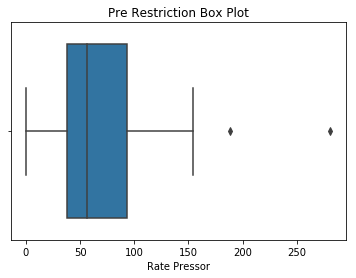

In [150]:
# box plot for pre

pre_box = sns.boxplot(x=x_pre).set_title('Pre Restriction Box Plot')
#pre_box.savefig('pre_restriction_box.png')
plt.savefig('pre_restriction_box.png')

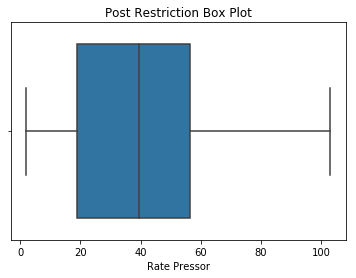

In [151]:
# box plot for post
pos_box = sns.boxplot(x=x_post).set_title('Post Restriction Box Plot')
plt.savefig('post_restriction_box.png')

/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/benjaminxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

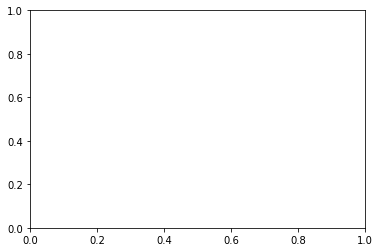

In [152]:
# histogram pre
plt.hist(x_pre, bins = 15)
plt.title('Pre Restriction Histogram')
plt.rcParams['figure.figsize'] = [15, 8]
plt.savefig('pre_restriction_histogram.png')
#plt.show()

ValueError: max must be larger than min in range parameter.

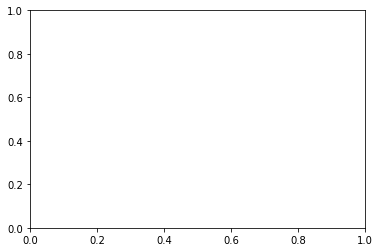

In [153]:
# histogram post
plt.hist(x_post, bins = 15)
plt.title('Post Restriction Histogram')
plt.figure(figsize=(15,8))
plt.savefig('post_restriction_histogram.png')
plt.show()

In [146]:
# time differences variables
x_prediff = prevas_df['Difference']
x_postdiff = postvas_df['Difference']

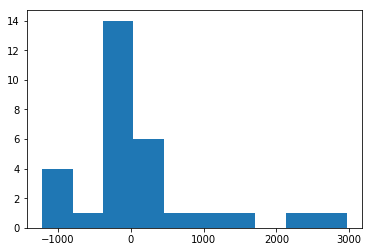

In [147]:
# histogram of pre restriction time difference

plt.hist(x_prediff)
plt.show()

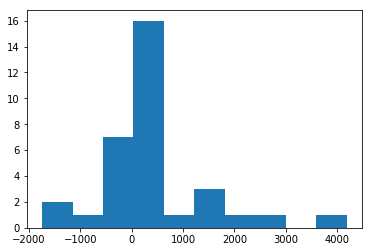

In [148]:
# histogram of post restriction time difference

plt.hist(x_postdiff)
plt.show()